In [65]:
import os
import re
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt 


In [66]:
def analyze_logs(filepath):
    clock_regex = re.compile(r"(\d+)\)")
    time_regex = re.compile(r'^(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})')
    queue_length_regex = re.compile(r'Current queue length is (\d+)')

    clock_jumps = []
    time_jumps = []
    experiment_clock_rates = []
    queue_lengths = []
    with open(filepath, 'r') as file:
        data = file.readlines()
        # get the clock rate from the first line
        clock_rate = int(data[0][-2:])
        # skip the first line that prints out the clock rate
        last_time = None
        last_clock = None
        for line in data[1:]:
            match = clock_regex.search(line)
            logical_clock = int(match.group(1))
            match = time_regex.search(line)
            time_stamp = datetime.strptime(match.group(1), '%Y-%m-%d %H:%M:%S,%f')
            match = queue_length_regex.search(line)
            if match:
                queue_length = int(match.group(1))
                queue_lengths.append(queue_length)

            if last_time and last_clock:
                time_diff = (time_stamp - last_time).microseconds / 1000000
                clock_diff = logical_clock - last_clock
                clock_jumps.append(clock_diff)
                time_jumps.append(time_diff)
                experiment_clock_rates.append(time_diff/clock_diff)

            last_clock = logical_clock
            last_time = time_stamp
            
    # print format string but only up to 2 decimal places
    print("Actual clock rate: {:.3f} (tick every {:.3f} seconds)".format(clock_rate, 1/clock_rate))
    print("\t\t\t\t\t\t\t Avg \t\t Max \t\t  Min")
    print("Difference in logical clock between machine operations:\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(np.mean(clock_jumps), np.max(clock_jumps), np.min(clock_jumps)))
    hist, bins = np.histogram(clock_jumps) 
    plt.hist(hist) 
    plt.title("Difference in logical clock between machine operations (s)") 
    plt.show()
    print("Difference in system time between machine operations: \t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(np.mean(time_jumps), np.max(time_jumps), np.min(time_jumps)))
    hist, bins = np.histogram(time_jumps) 
    plt.hist(hist) 
    plt.title("Difference in system time between machine operations (s)") 
    plt.show()
    print("Queue lengths: \t\t\t\t\t\t {:.3f} \t\t {:.3f} \t\t {:.3f}".format(np.mean(queue_lengths), np.max(queue_lengths), np.min(queue_lengths)))
    hist, bins = np.histogram(queue_lengths) 
    plt.hist(hist) 
    plt.title("Queue lengths") 
    plt.show()
    print("Experiment clock rates (seconds between clock ticks): \t {:.3f} \t\t {:.3f} \t\t {:.3f}\n".format(np.mean(experiment_clock_rates), np.max(experiment_clock_rates), np.min(experiment_clock_rates)))
    hist, bins = np.histogram(experiment_clock_rates) 
    plt.hist(hist) 
    plt.title("Experiment clock rates  (seconds between clock ticks)") 
    plt.show()




## Experiment 1:
### Machine 0:
Actual clock rate: 1.000 (tick every 1.000 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 3.869 		 16.000 		 1.000


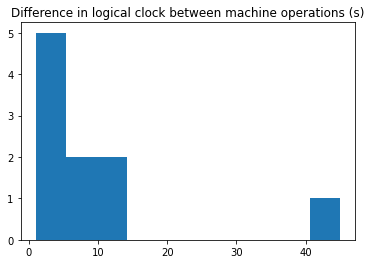

Difference in system time between machine operations: 	 0.003 		 0.008 		 0.000


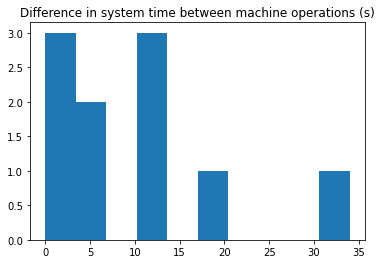

Queue lengths: 						 24.192 		 41.000 		 0.000


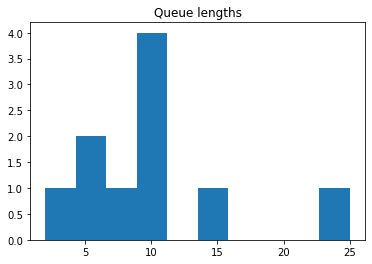

Experiment clock rates (seconds between clock ticks): 	 0.002 		 0.006 		 0.000



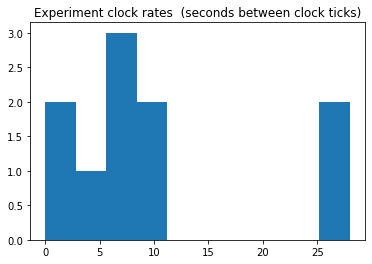

### Machine 1:
Actual clock rate: 3.000 (tick every 0.333 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.953 		 15.000 		 1.000


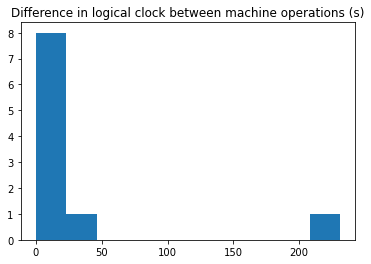

Difference in system time between machine operations: 	 0.337 		 0.349 		 0.333


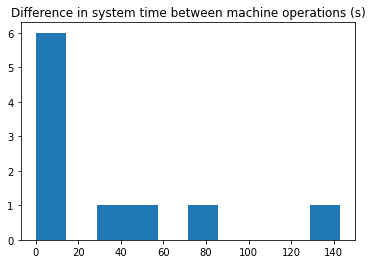

Queue lengths: 						 0.069 		 1.000 		 0.000


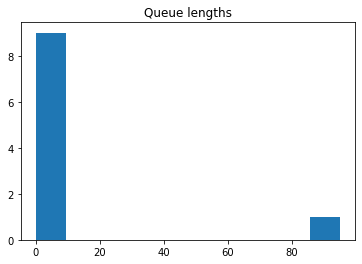

Experiment clock rates (seconds between clock ticks): 	 0.268 		 0.339 		 0.023



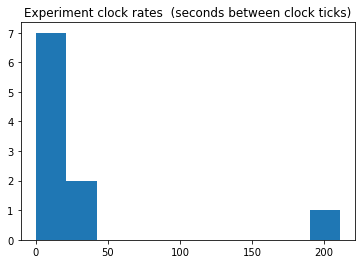

### Machine 2:
Actual clock rate: 6.000 (tick every 0.167 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


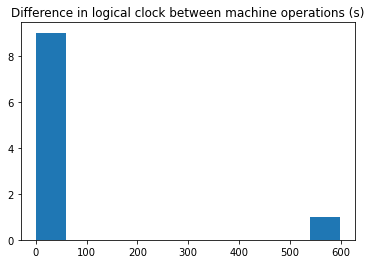

Difference in system time between machine operations: 	 0.170 		 0.181 		 0.166


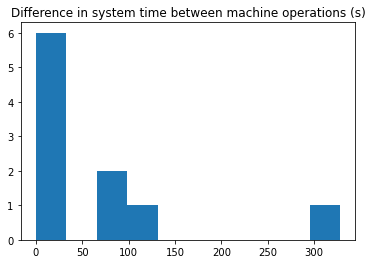

Queue lengths: 						 0.000 		 0.000 		 0.000


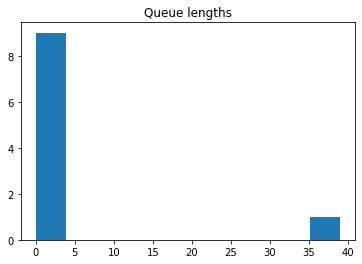

Experiment clock rates (seconds between clock ticks): 	 0.170 		 0.181 		 0.166



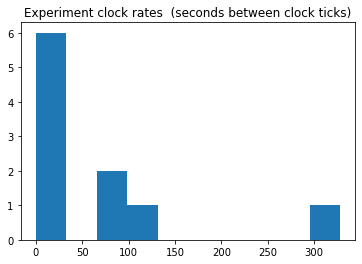

## Experiment 2:
### Machine 0:
Actual clock rate: 2.000 (tick every 0.500 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.980 		 10.000 		 1.000


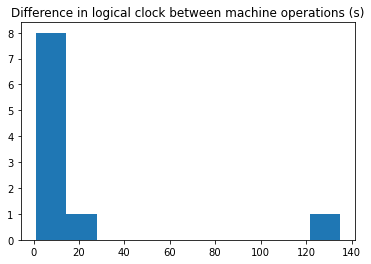

Difference in system time between machine operations: 	 0.504 		 0.514 		 0.498


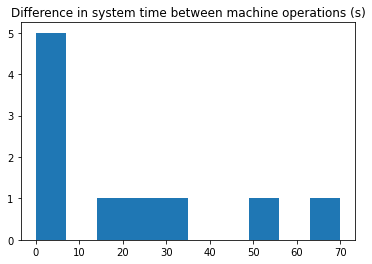

Queue lengths: 						 0.636 		 4.000 		 0.000


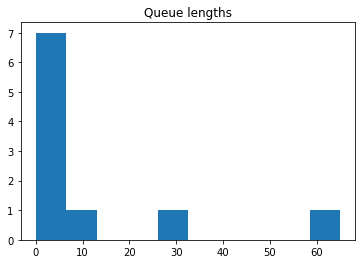

Experiment clock rates (seconds between clock ticks): 	 0.392 		 0.514 		 0.050



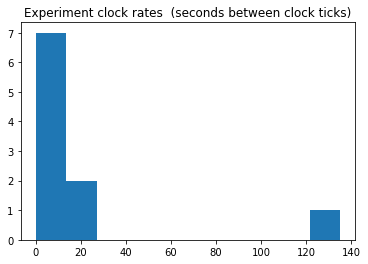

### Machine 1:
Actual clock rate: 3.000 (tick every 0.333 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.314 		 6.000 		 1.000


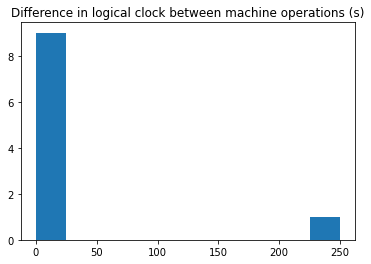

Difference in system time between machine operations: 	 0.337 		 0.346 		 0.332


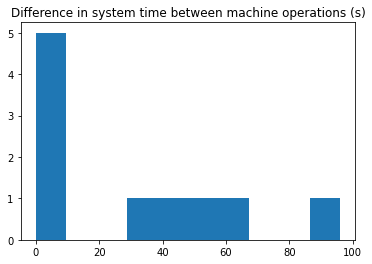

Queue lengths: 						 0.094 		 1.000 		 0.000


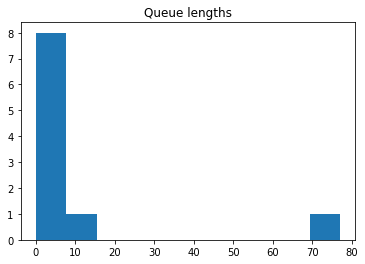

Experiment clock rates (seconds between clock ticks): 	 0.303 		 0.346 		 0.056



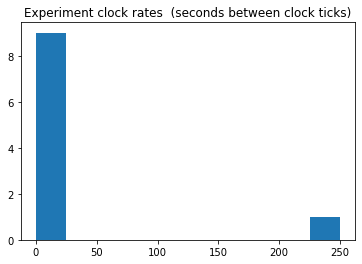

### Machine 2:
Actual clock rate: 4.000 (tick every 0.250 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


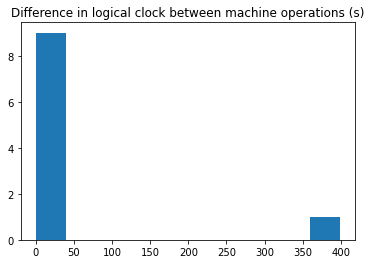

Difference in system time between machine operations: 	 0.254 		 0.257 		 0.250


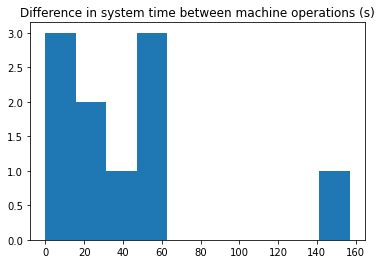

Queue lengths: 						 0.000 		 0.000 		 0.000


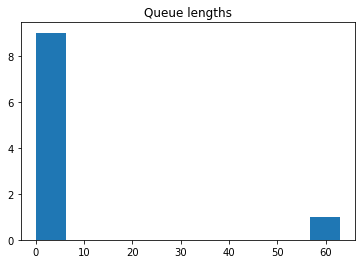

Experiment clock rates (seconds between clock ticks): 	 0.254 		 0.257 		 0.250



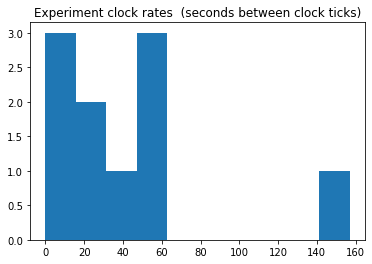

## Experiment 3:
### Machine 0:
Actual clock rate: 3.000 (tick every 0.333 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


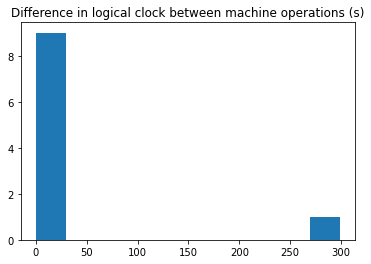

Difference in system time between machine operations: 	 0.337 		 0.354 		 0.331


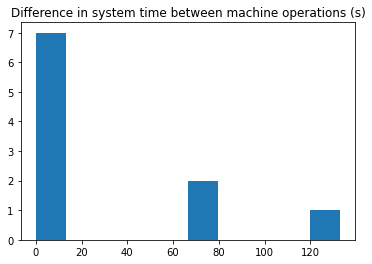

Queue lengths: 						 0.049 		 1.000 		 0.000


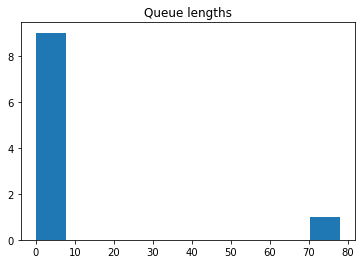

Experiment clock rates (seconds between clock ticks): 	 0.337 		 0.354 		 0.331



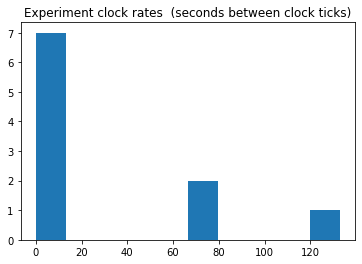

### Machine 1:
Actual clock rate: 3.000 (tick every 0.333 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


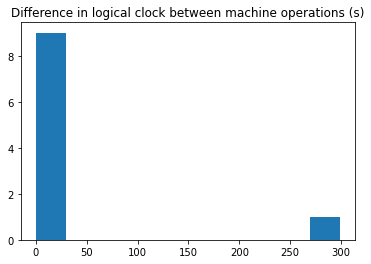

Difference in system time between machine operations: 	 0.337 		 0.345 		 0.333


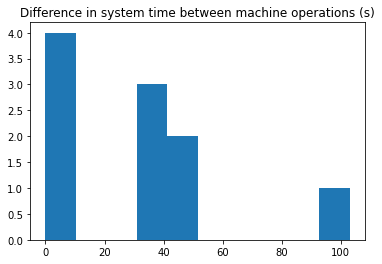

Queue lengths: 						 0.170 		 2.000 		 0.000


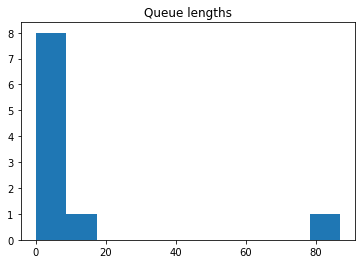

Experiment clock rates (seconds between clock ticks): 	 0.337 		 0.345 		 0.333



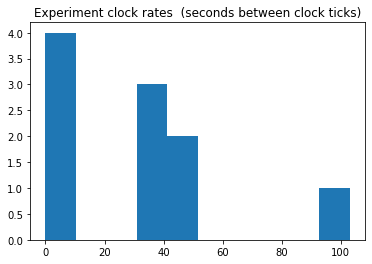

### Machine 2:
Actual clock rate: 3.000 (tick every 0.333 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


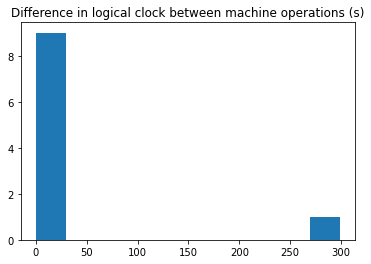

Difference in system time between machine operations: 	 0.337 		 0.356 		 0.332


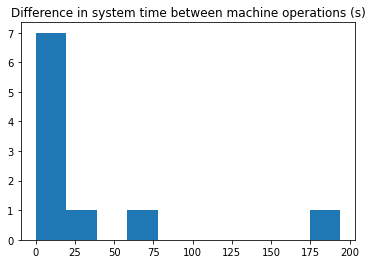

Queue lengths: 						 0.056 		 1.000 		 0.000


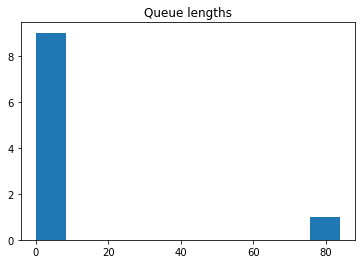

Experiment clock rates (seconds between clock ticks): 	 0.337 		 0.356 		 0.332



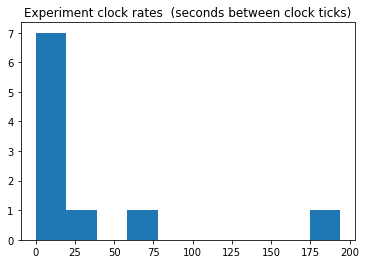

## Experiment 4:
### Machine 0:
Actual clock rate: 5.000 (tick every 0.200 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


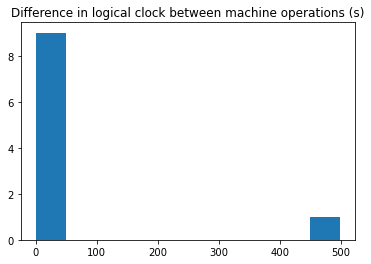

Difference in system time between machine operations: 	 0.204 		 0.215 		 0.200


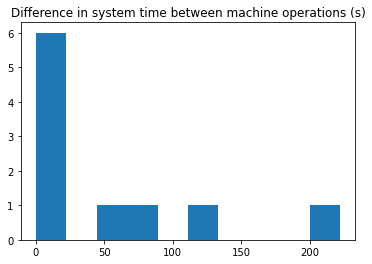

Queue lengths: 						 0.000 		 0.000 		 0.000


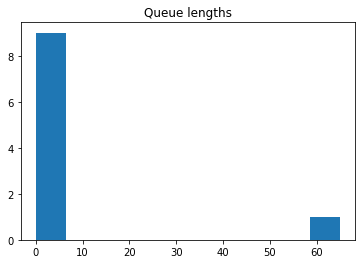

Experiment clock rates (seconds between clock ticks): 	 0.204 		 0.215 		 0.200



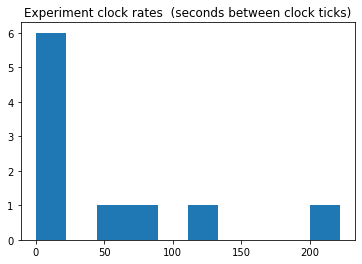

### Machine 1:
Actual clock rate: 1.000 (tick every 1.000 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 2.758 		 9.000 		 1.000


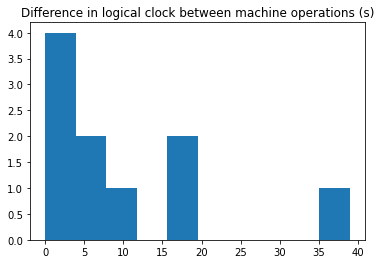

Difference in system time between machine operations: 	 0.004 		 0.017 		 0.000


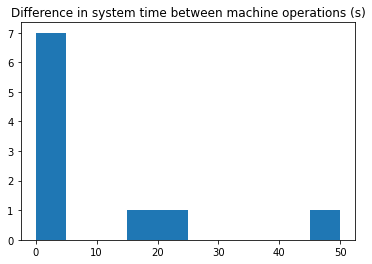

Queue lengths: 						 40.727 		 78.000 		 1.000


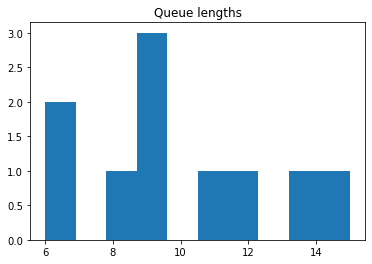

Experiment clock rates (seconds between clock ticks): 	 0.002 		 0.009 		 0.000



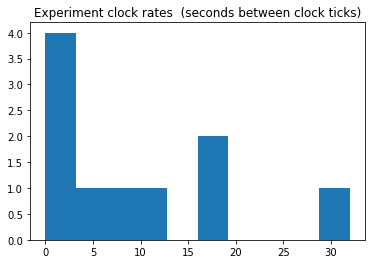

### Machine 2:
Actual clock rate: 5.000 (tick every 0.200 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


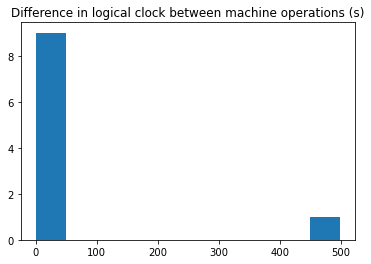

Difference in system time between machine operations: 	 0.204 		 0.210 		 0.199


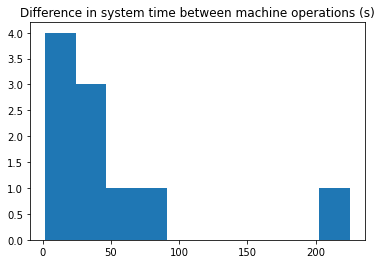

Queue lengths: 						 0.011 		 1.000 		 0.000


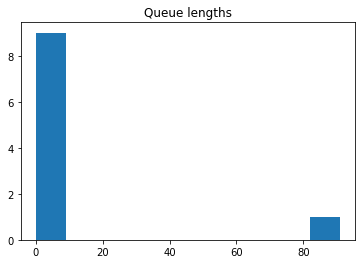

Experiment clock rates (seconds between clock ticks): 	 0.204 		 0.210 		 0.199



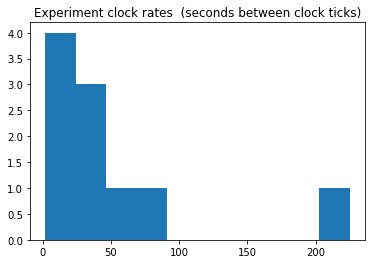

## Experiment 5:
### Machine 0:
Actual clock rate: 2.000 (tick every 0.500 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.000 		 1.000 		 1.000


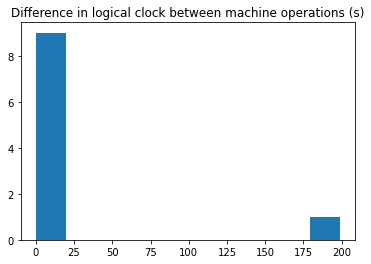

Difference in system time between machine operations: 	 0.504 		 0.507 		 0.500


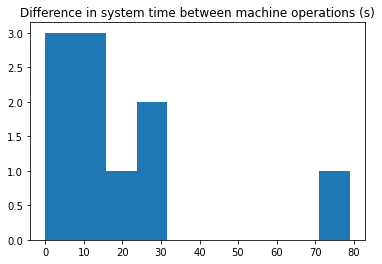

Queue lengths: 						 0.053 		 1.000 		 0.000


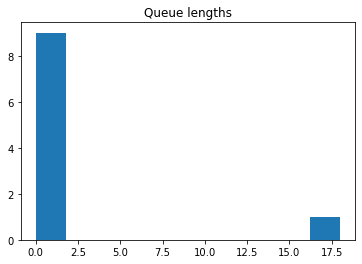

Experiment clock rates (seconds between clock ticks): 	 0.504 		 0.507 		 0.500



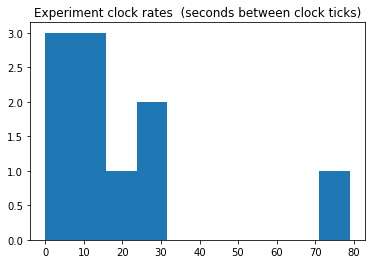

### Machine 1:
Actual clock rate: 1.000 (tick every 1.000 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.980 		 11.000 		 1.000


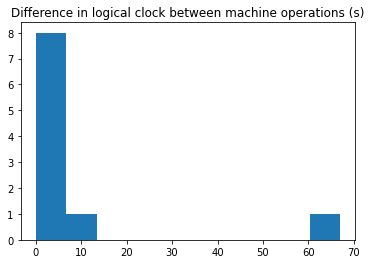

Difference in system time between machine operations: 	 0.004 		 0.006 		 0.000


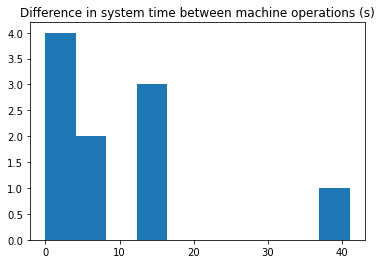

Queue lengths: 						 0.104 		 1.000 		 0.000


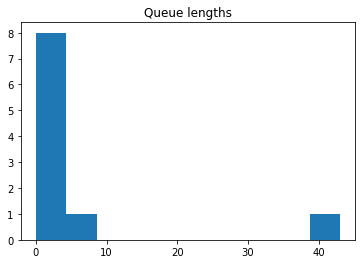

Experiment clock rates (seconds between clock ticks): 	 0.003 		 0.006 		 0.000



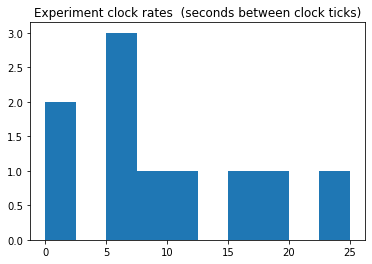

### Machine 2:
Actual clock rate: 1.000 (tick every 1.000 seconds)
							 Avg 		 Max 		  Min
Difference in logical clock between machine operations:	 1.980 		 11.000 		 1.000


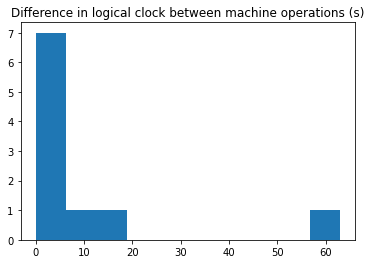

Difference in system time between machine operations: 	 0.004 		 0.006 		 0.000


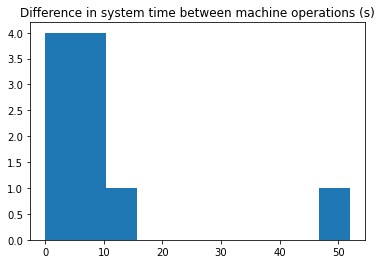

Queue lengths: 						 0.346 		 3.000 		 0.000


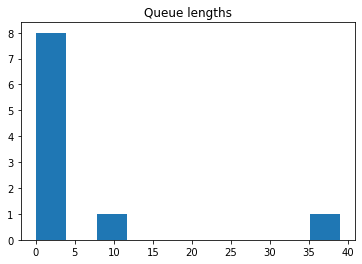

Experiment clock rates (seconds between clock ticks): 	 0.003 		 0.006 		 0.000



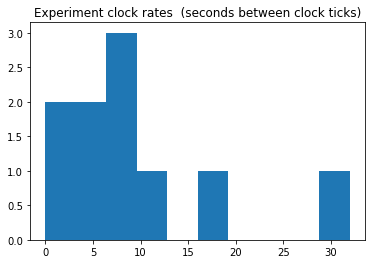

In [67]:
log_folders = sorted(os.listdir("logs"))
for experiment_folder in range(len(log_folders)):
    print("## Experiment {}:".format(experiment_folder + 1))
    directory = os.path.join("logs", log_folders[experiment_folder])
    files = sorted(os.listdir(directory))
    for file_index in range(len(files)):
        f = os.path.join(directory, files[file_index])
        print("### Machine {}:".format(file_index))
        analyze_logs(f)